# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [46]:
import pandas as pd

In [47]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

In [49]:
data.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [ ]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
(data == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [53]:
data_clean = data.copy()

In [54]:
data_clean = data_clean[~(data_clean == '?').any(axis=1)]

In [55]:
data_clean.shape

(30162, 15)

In [56]:
(data_clean == '?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [57]:
data_clean = data_clean.drop(columns=['education'])

In [58]:
data_clean.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [59]:
data_clean['income'].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [60]:
data_clean['income'] = data_clean['income'].map({'<=50K': 0, '>50K': 1})

In [61]:
data_clean['income'].value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

In [62]:
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


In [63]:
data_clean.duplicated().sum()

np.int64(23)

In [64]:
data_clean = data_clean.drop_duplicates()

In [65]:
data_clean.duplicated().sum()

np.int64(0)

In [66]:
data_clean.shape

(30139, 14)

In [67]:
X = data_clean.drop(columns=['hours-per-week'])
y = data_clean['hours-per-week']

In [68]:
y.describe()

count    30139.000000
mean        40.934703
std         11.978753
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

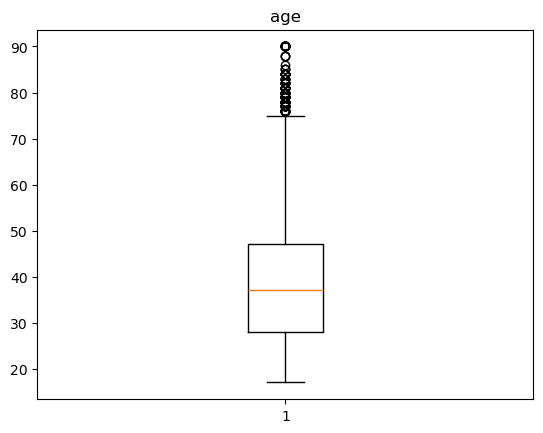

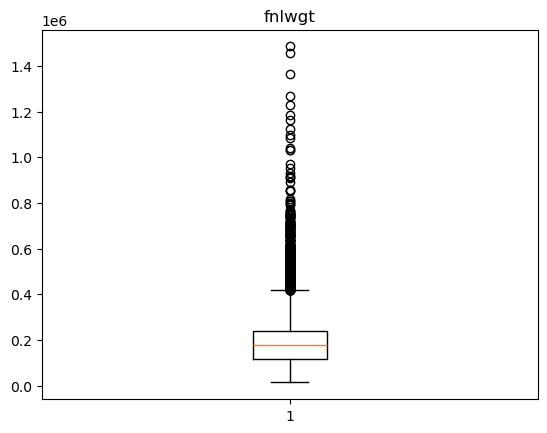

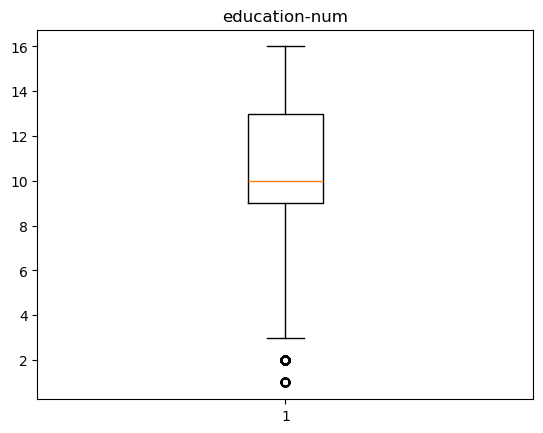

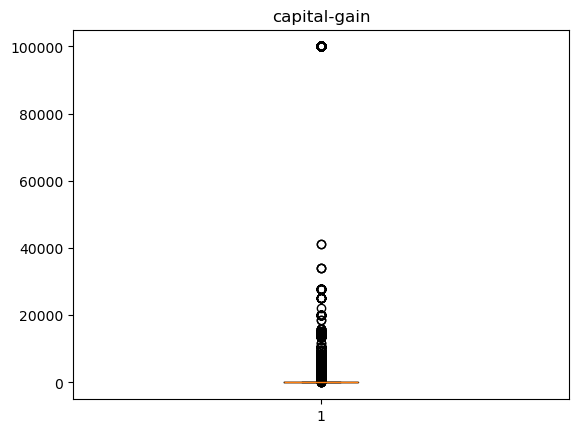

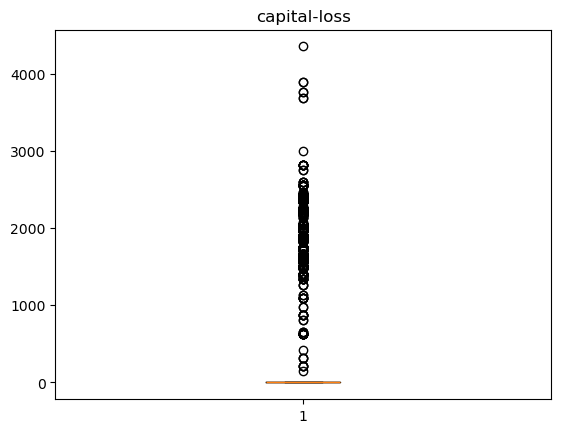

In [69]:
import matplotlib.pyplot as plt

num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']

for col in num_cols:
    plt.figure()
    plt.boxplot(data_clean[col])
    plt.title(col)
    plt.show()

In [70]:
import numpy as np

data_clean['capital-gain-log'] = np.log1p(data_clean['capital-gain'])
data_clean['capital-loss-log'] = np.log1p(data_clean['capital-loss'])

In [71]:
data_clean = data_clean.drop(columns=['capital-gain', 'capital-loss'])

In [72]:
data_clean[['capital-gain-log', 'capital-loss-log']].describe()

,capital-gain-log,capital-loss-log
count,30139.000000,30139.000000
mean,0.744214,0.355497
std,2.471375,1.595588
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512925,8.379539


In [73]:
data_clean['age_group'] = pd.cut(
    data_clean['age'],
    bins=[0, 25, 45, 65, 100],
    labels=['young', 'adult', 'senior', 'elder']
)

In [74]:
data_clean['age_group'].value_counts()

age_group
adult     15748
senior     7896
young      5657
elder       838
Name: count, dtype: int64

In [75]:
categorical_cols = [
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'age_group'
]

data_encoded = pd.get_dummies(
    data_clean,
    columns=categorical_cols,
    drop_first=True
)


In [76]:
data_encoded.shape

(30139, 85)

In [77]:
data_encoded.head()

,age,fnlwgt,education-num,hours-per-week,income,capital-gain-log,capital-loss-log,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age_group_adult,age_group_senior,age_group_elder
0,39,77516,13,40,0,7.684784,0.0,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,50,83311,13,13,0,0.000000,0.0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,38,215646,9,40,0,0.000000,0.0,False,True,False,...,False,False,False,False,True,False,False,True,False,False
3,53,234721,7,40,0,0.000000,0.0,False,True,False,...,False,False,False,False,True,False,False,False,True,False
4,28,338409,13,40,0,0.000000,0.0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [78]:
X = data_encoded.drop(columns=['hours-per-week'])
y = data_encoded['hours-per-week']

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = [
    'age',
    'fnlwgt',
    'education-num',
    'capital-gain-log',
    'capital-loss-log',
    'income'
]

X[num_cols] = scaler.fit_transform(X[num_cols])


In [80]:
X[num_cols].describe().round(2)

,age,fnlwgt,education-num,capital-gain-log,capital-loss-log,income
count,30139.00,30139.00,30139.00,30139.00,30139.00,30139.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.63,-1.67,-3.58,-0.30,-0.22,-0.58
25%,-0.80,-0.68,-0.44,-0.30,-0.22,-0.58
50%,-0.11,-0.11,-0.05,-0.30,-0.22,-0.58
75%,0.65,0.45,1.13,-0.30,-0.22,-0.58
max,3.93,12.26,2.31,4.36,5.03,1.74


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24111, 84), (6028, 84), (24111,), (6028,))

In [83]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)